In [36]:
from tensorflow.keras.datasets import fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

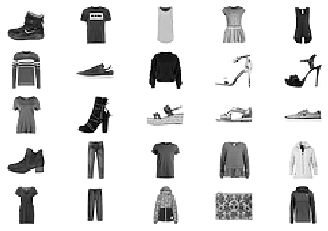

In [2]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain = xtrain / 255

In [9]:
xtest = xtest / 255

In [6]:
K.clear_session()

m = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

In [7]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs=100
m.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = m.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.5875 - accuracy: 0.8016 - val_loss: 0.4395 - val_accuracy: 0.8456
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8536 - val_loss: 0.4201 - val_accuracy: 0.8500
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3805 - accuracy: 0.8643 - val_loss: 0.3798 - val_accuracy: 0.8632
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3525 - accuracy: 0.8752 - val_loss: 0.3607 - val_accuracy: 0.8712
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8797 - val_loss: 0.3661 - val_accuracy: 0.8685
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3194 - accuracy: 0.8849 - val_loss: 0.3600 - val_accuracy: 0.8715
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3044 - accuracy: 0.8888 - val_loss: 0.3451 - val_accuracy: 0.8746

Epoch 58/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9634 - val_loss: 0.4251 - val_accuracy: 0.8873
Epoch 59/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0979 - accuracy: 0.9647 - val_loss: 0.4210 - val_accuracy: 0.8883
Epoch 60/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0971 - accuracy: 0.9665 - val_loss: 0.4195 - val_accuracy: 0.8880
Epoch 61/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0965 - accuracy: 0.9655 - val_loss: 0.4400 - val_accuracy: 0.8838
Epoch 62/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0938 - accuracy: 0.9664 - val_loss: 0.4385 - val_accuracy: 0.8874
Epoch 63/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0902 - accuracy: 0.9682 - val_loss: 0.4458 - val_accuracy: 0.8845
Epoch 64/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9677 - val_loss: 0.4450 - val_accuracy:

In [10]:
m.evaluate(xtest, ytest, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.8836


[0.6293580532073975, 0.8835999965667725]

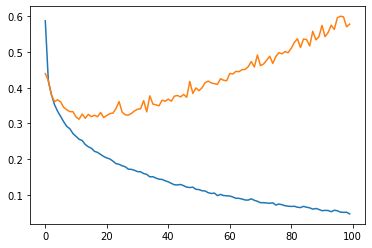

In [11]:
# inspect the history object
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

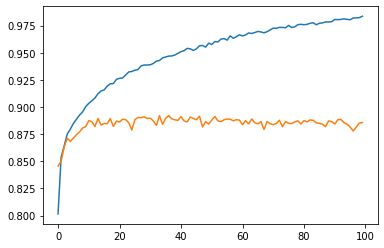

In [12]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])

In [13]:
# save a list of np.arrays with the weights
w = m.get_weights()

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


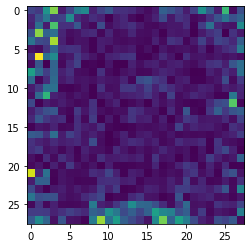

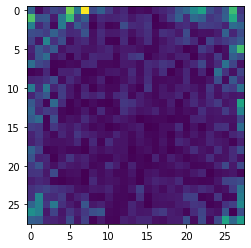

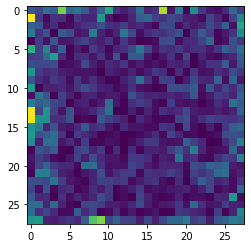

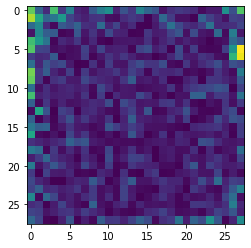

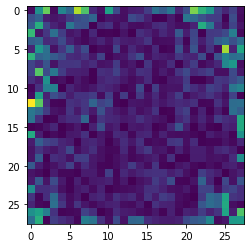

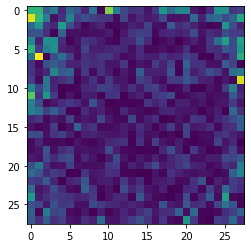

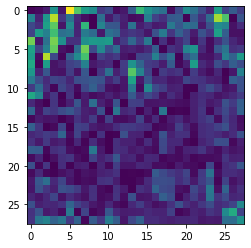

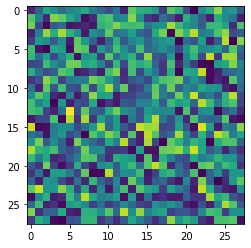

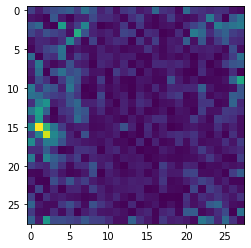

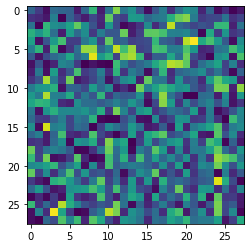

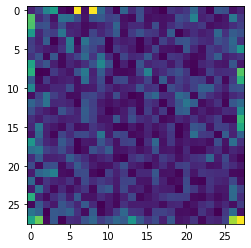

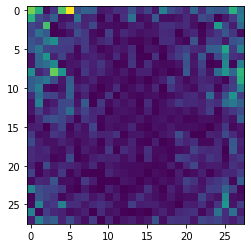

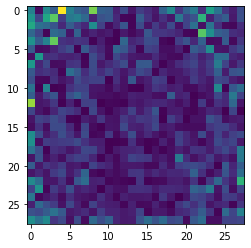

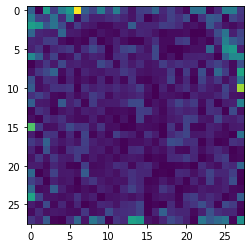

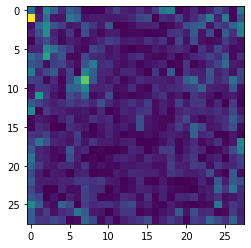

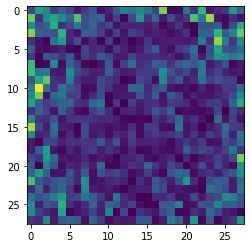

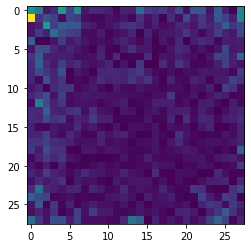

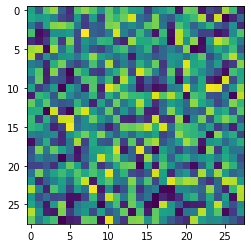

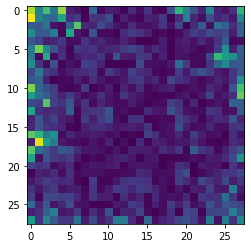

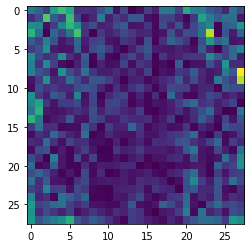

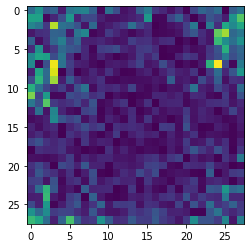

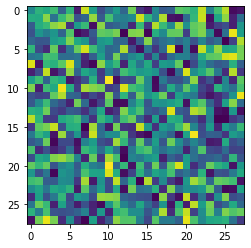

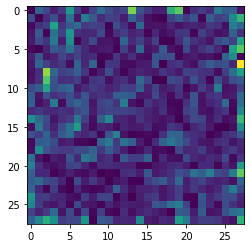

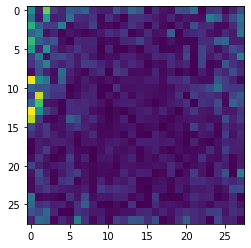

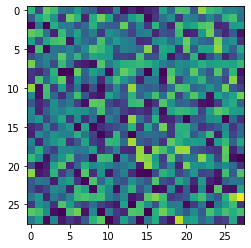

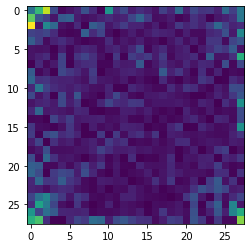

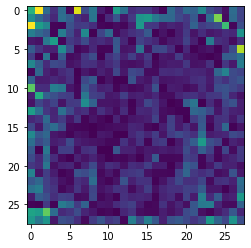

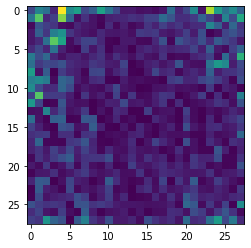

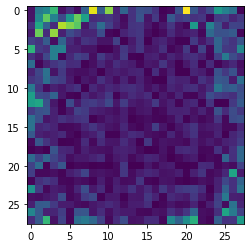

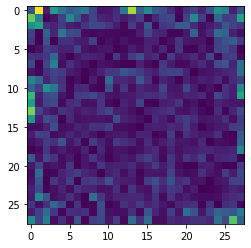

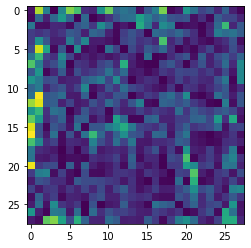

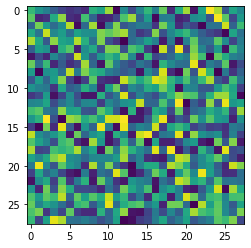

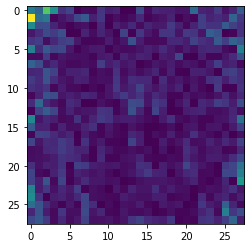

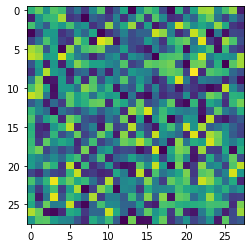

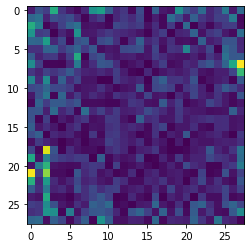

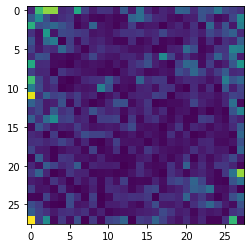

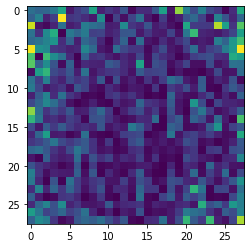

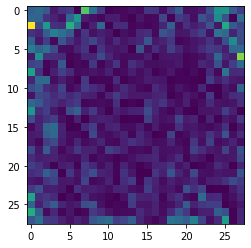

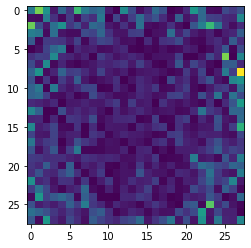

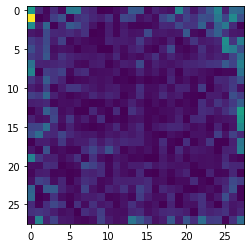

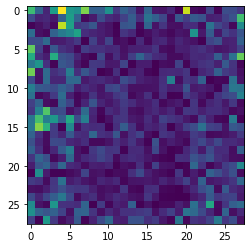

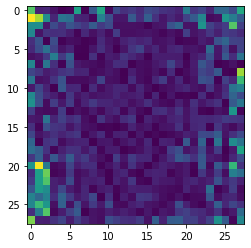

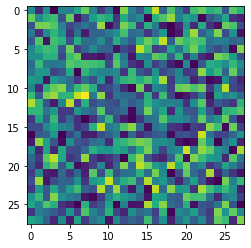

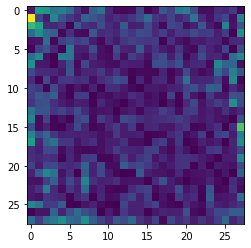

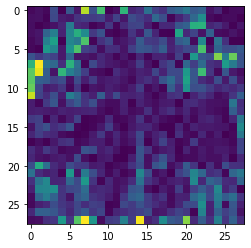

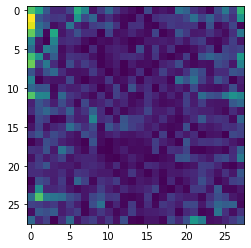

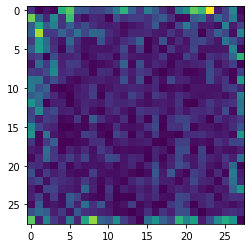

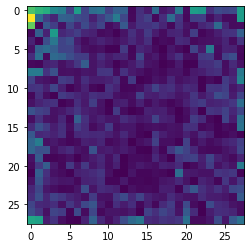

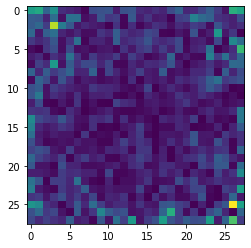

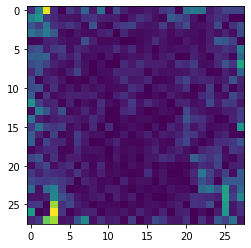

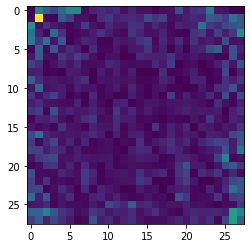

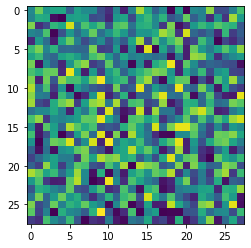

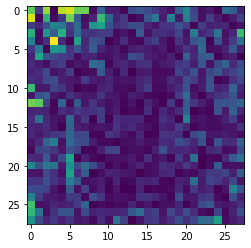

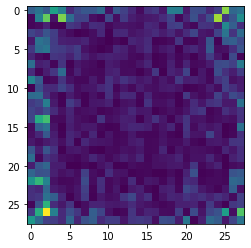

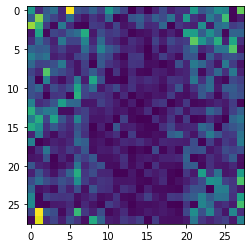

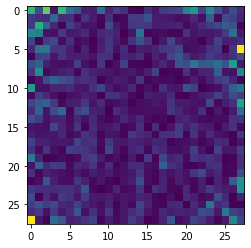

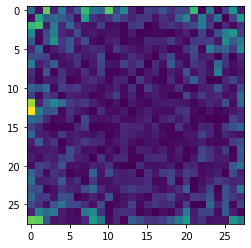

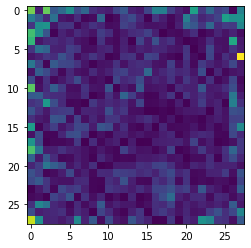

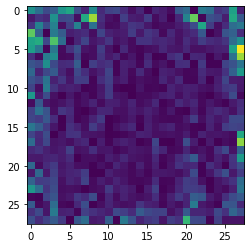

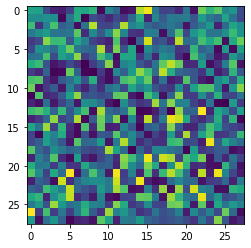

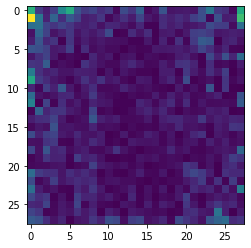

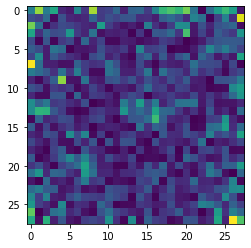

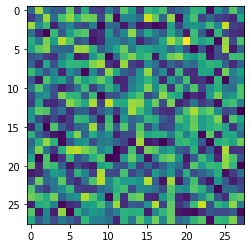

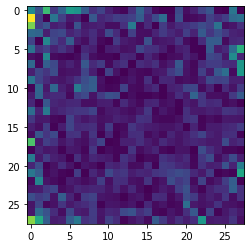

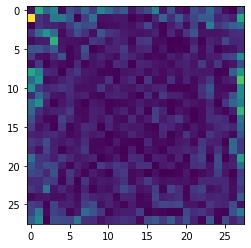

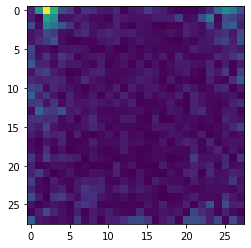

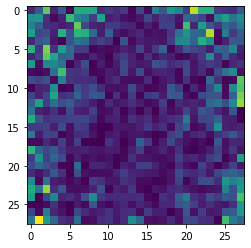

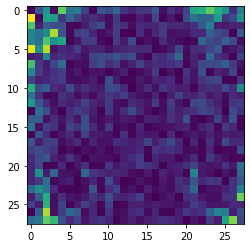

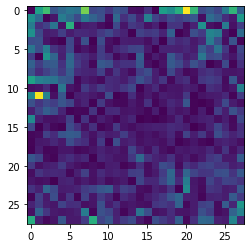

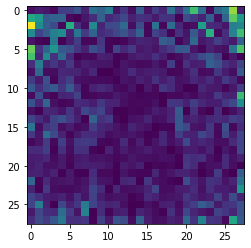

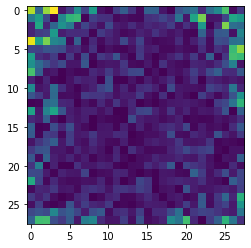

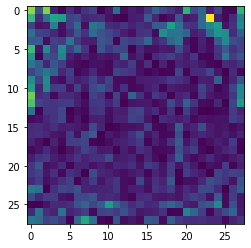

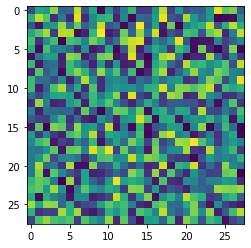

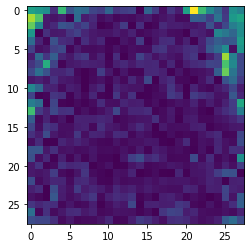

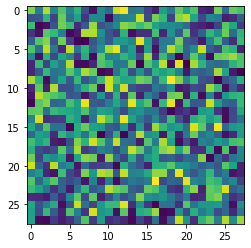

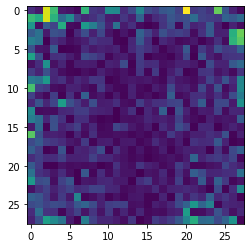

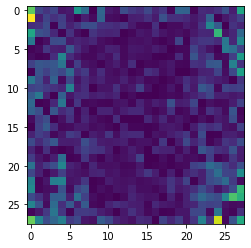

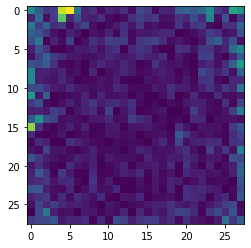

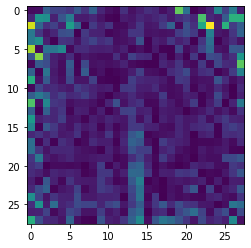

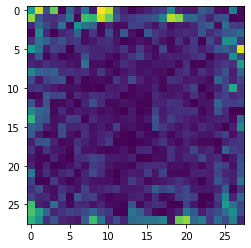

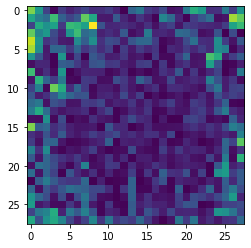

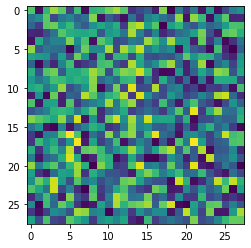

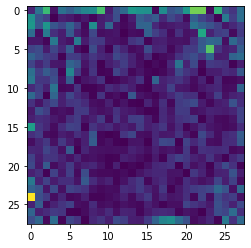

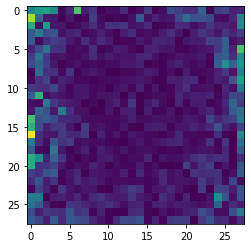

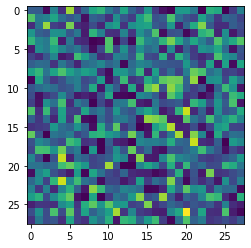

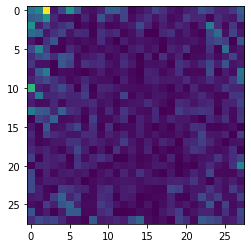

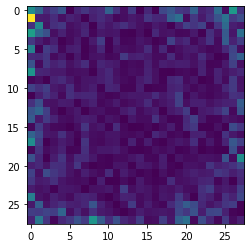

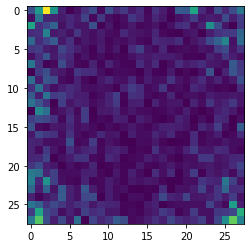

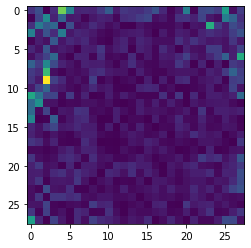

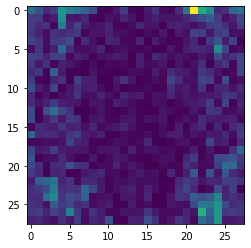

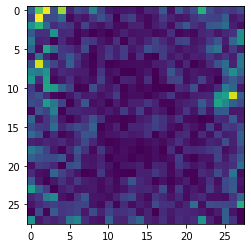

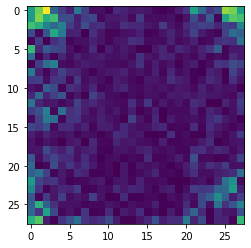

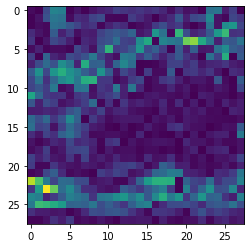

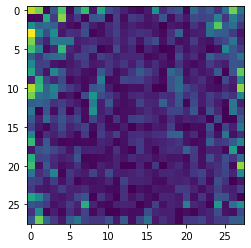

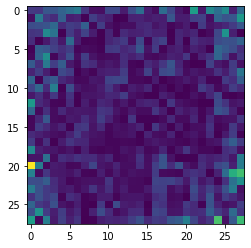

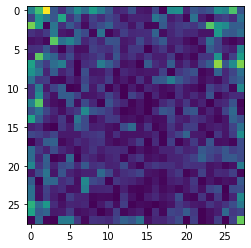

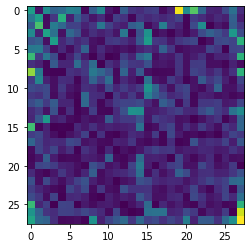

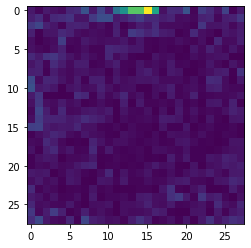

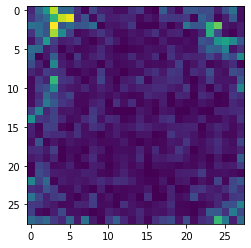

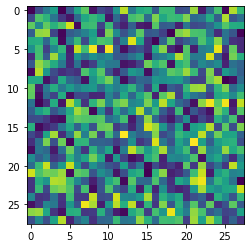

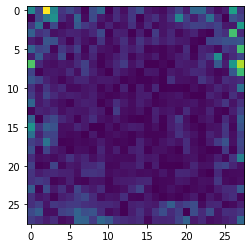

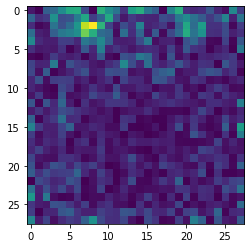

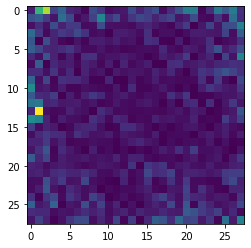

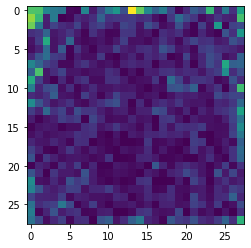

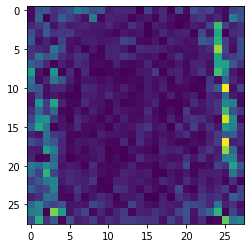

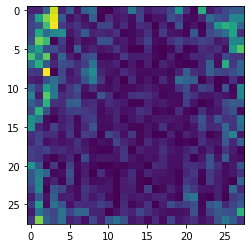

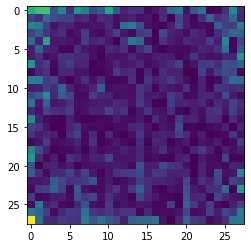

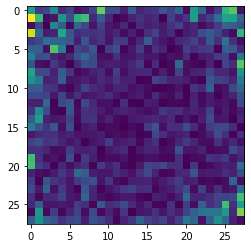

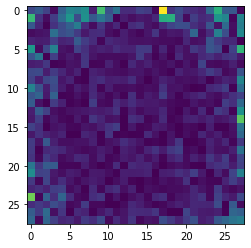

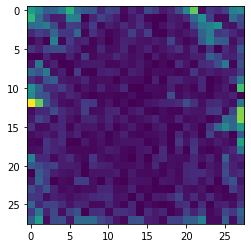

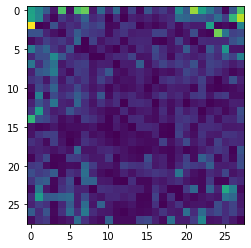

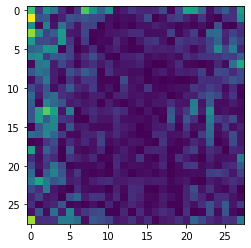

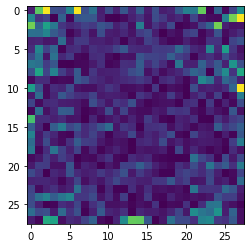

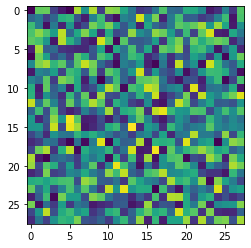

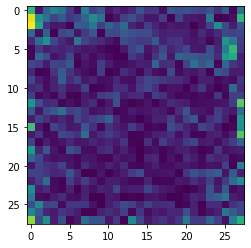

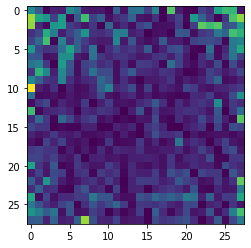

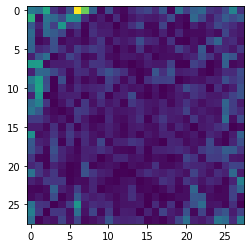

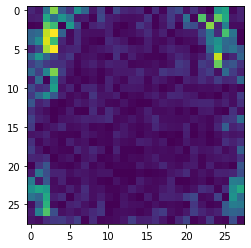

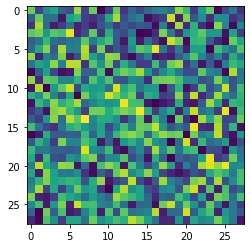

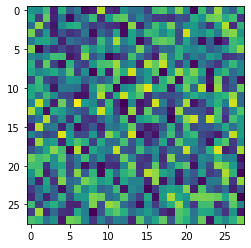

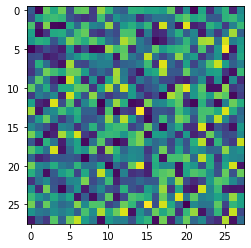

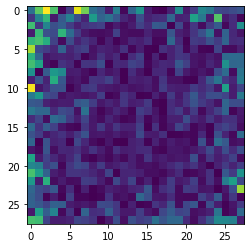

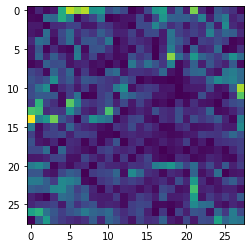

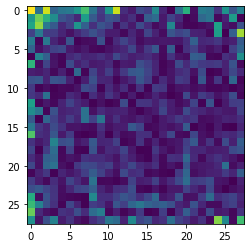

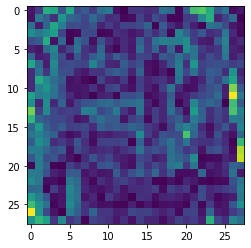

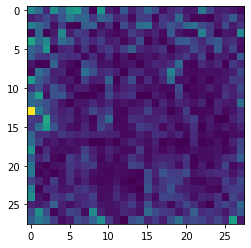

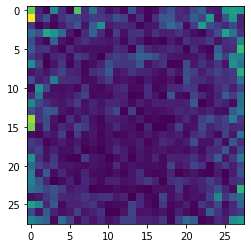

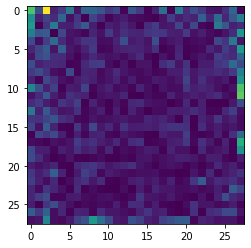

In [14]:
for k in range(128):
    weights = []
    for i in range(784):
        weights.append(w[0][i][k])
    weights = np.asarray(weights, dtype=float)

    plt.figure()
    plt.imshow(np.abs(weights).reshape((28, 28)))

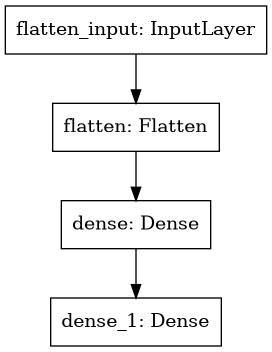

In [30]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(m,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

### CNN

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
callback = EarlyStopping(monitor='loss', patience=3)

In [29]:
# reshape dataset to have a single channel
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

In [30]:
# convert from integers to floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [31]:
K.clear_session()

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [32]:
epochs=20
cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = cnn.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2, callbacks=[callback])

Epoch 1/20
375/375 [==============================] - 17s 46ms/step - loss: 0.5816 - accuracy: 0.7924 - val_loss: 0.4099 - val_accuracy: 0.8547
Epoch 2/20
375/375 [==============================] - 17s 45ms/step - loss: 0.3708 - accuracy: 0.8666 - val_loss: 0.3397 - val_accuracy: 0.8766
Epoch 3/20
375/375 [==============================] - 18s 48ms/step - loss: 0.3217 - accuracy: 0.8824 - val_loss: 0.3241 - val_accuracy: 0.8834
Epoch 4/20
375/375 [==============================] - 18s 49ms/step - loss: 0.2914 - accuracy: 0.8941 - val_loss: 0.2906 - val_accuracy: 0.8962
Epoch 5/20
375/375 [==============================] - 18s 47ms/step - loss: 0.2687 - accuracy: 0.9030 - val_loss: 0.3066 - val_accuracy: 0.8888
Epoch 6/20
375/375 [==============================] - 17s 46ms/step - loss: 0.2473 - accuracy: 0.9102 - val_loss: 0.2888 - val_accuracy: 0.8948
Epoch 7/20
375/375 [==============================] - 17s 46ms/step - loss: 0.2299 - accuracy: 0.9162 - val_loss: 0.2606 - val_accuracy:

### Visualization

In [25]:
# https://www.tensorflow.org/tutorials/keras/classification

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
predictions = m.predict(xtest)

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


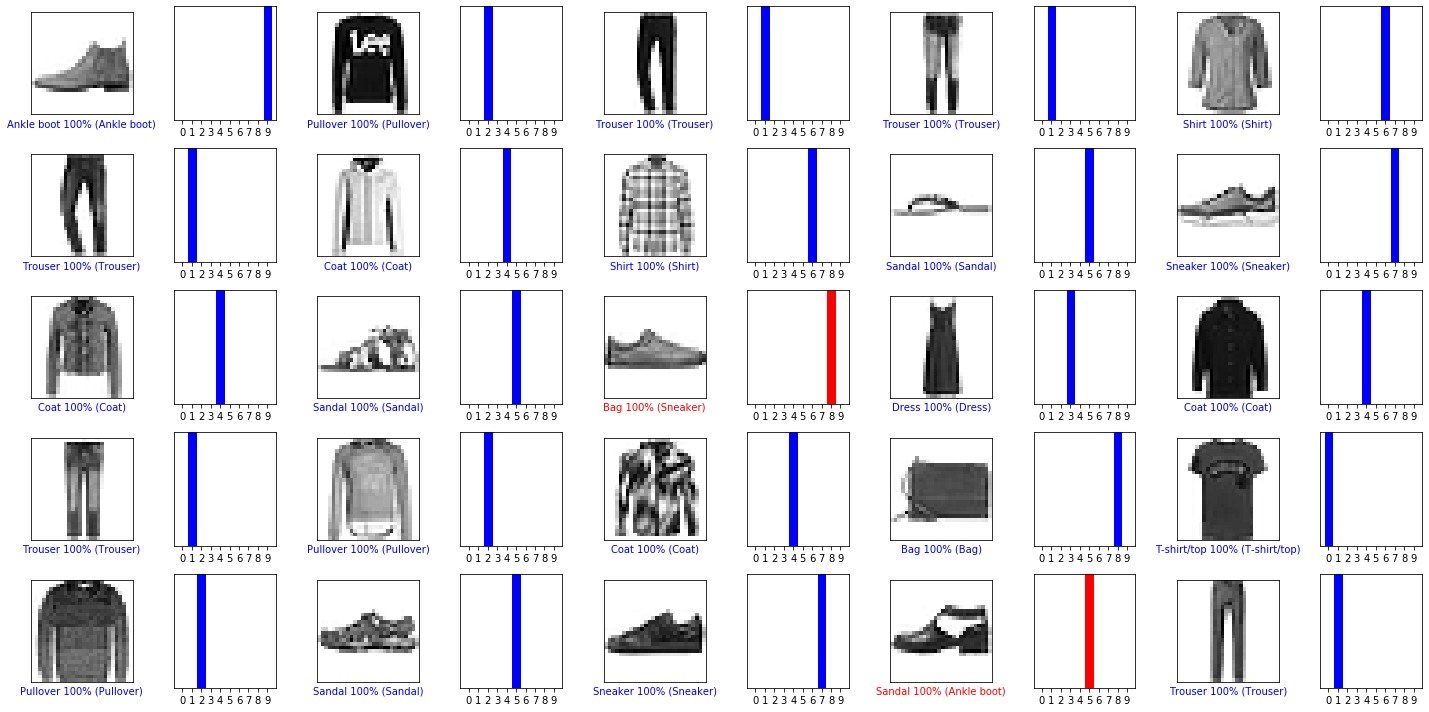

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], ytest)
plt.tight_layout()
plt.show()